
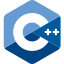
<br>

<div style="text-align:center; font-size:200%;">
 <b>Vektor-Implementierung (V4)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 17 Vektor-Implementierung (V4).ipynb -->
<!-- slides/module_150_classes/topic_200_my_vector_v4.cpp -->


## `MyVector`-Class

- Mit der Move-Semantik können wir viele unnötige Kopien vermeiden.
- Wann immer ein temporärer Vektor an eine Funktion oder einen Konstruktor
  übergeben wird, können wir verschieben statt zu kopieren.

In [ ]:
#include <algorithm>
#include <iostream>

In [ ]:
class MyVector
{
public:
    MyVector() = default;
    explicit MyVector(std::size_t size, int value = 0);
    MyVector(std::initializer_list<int> init);

    MyVector(const MyVector& other)
        : size_(other.size_), capacity_(other.capacity_), data_(new int[size_])
    {
        std::copy(other.data_, other.data_ + size_, data_);
        std::cout << "Copy constructor called\n";
    }

    MyVector& operator=(const MyVector& other)
    {
        if (this != &other) {
            delete[] data_;
            size_ = other.size_;
            capacity_ = other.capacity_;
            data_ = new int[size_];
            std::copy(other.data_, other.data_ + size_, data_);
        }
        std::cout << "Copy assignment called\n";
        return *this;
    }

    MyVector(MyVector&& other) noexcept
        : size_(other.size_), capacity_(other.capacity_), data_(other.data_)
    {
        other.size_ = 0;
        other.capacity_ = 0;
        other.data_ = nullptr;
        std::cout << "Move constructor called\n";
    }

    MyVector& operator=(MyVector&& other) noexcept
    {
        delete[] data_;
        size_ = other.size_;
        capacity_ = other.capacity_;
        data_ = other.data_;
        other.size_ = 0;
        other.capacity_ = 0;
        other.data_ = nullptr;
        std::cout << "Move assignment called\n";
        return *this;
    }

    ~MyVector();

    void push_back(int value);
    int at(std::size_t index) const;
    int& at(std::size_t index);
    std::size_t size() const;
    std::size_t capacity() const;
    void print() const;

private:
    std::size_t size_{0};
    std::size_t capacity_{0};
    int* data_{nullptr};
};


## `MyVector`-Implementierung


In [ ]:
MyVector::MyVector(std::size_t size, int value)
    : size_(size), capacity_(size), data_(new int[size_])
{
    std::fill_n(data_, size_, value);
}

In [ ]:
MyVector::MyVector(std::initializer_list<int> init)
    : size_(init.size()), capacity_(init.size()), data_(new int[size_])
{
    std::copy(init.begin(), init.end(), data_);
}

In [ ]:
#include <iostream>

In [ ]:
MyVector::~MyVector()
{
    delete[] data_;
    data_ = nullptr;
    size_ = 0;
    capacity_ = 0;
    std::cout << "Deleted MyVector\n";
}

In [ ]:
void MyVector::push_back(int value)
{
    if (size_ == capacity_) {
        std::size_t new_capacity = capacity_ == 0 ? 1 : capacity_ * 2;
        int* new_data = new int[new_capacity];
        for (std::size_t i = 0; i != size_; ++i) {
            new_data[i] = data_[i];
        }
        delete[] data_;
        data_ = new_data;
        capacity_ = new_capacity;
    }
    data_[size_] = value;
    ++size_;
}

In [ ]:
int MyVector::at(std::size_t index) const
{
    // The `at()` method should do bounds checking...
    return data_[index];
}

In [ ]:
int& MyVector::at(std::size_t index) {
    // ...but we don't do it here since we haven't talked about exceptions yet
    return data_[index];
}

In [ ]:
std::size_t MyVector::size() const { return size_; }

In [ ]:
std::size_t MyVector::capacity() const { return capacity_; }

In [ ]:
#include <iostream>

In [ ]:
void MyVector::print() const
{
    std::cout << "[";
    for (std::size_t i = 0; i < size_; ++i) {
        std::cout << data_[i];
        if (i < size_ - 1) {
            std::cout << ", ";
        }
    }
    std::cout << "]";
}

In [ ]:
void print_info(const MyVector& vec)
{
    std::cout << "size: " << vec.size() << "\n";
    std::cout << "capacity: " << vec.capacity() << "\n";
    std::cout << "data: ";
    vec.print();
    std::cout << "\n";
}


## Verwenden von `MyVector`

- `MyVector`-Objekte werden jetzt korrekt kopiert und zerstört.

In [ ]:
MyVector vec;
print_info(vec);

In [ ]:
vec.push_back(1);
print_info(vec);

In [ ]:
vec.at(0)

In [ ]:
vec.push_back(2);
print_info(vec);

In [ ]:
vec.push_back(3);
print_info(vec);

In [ ]:
vec.push_back(4);
vec.push_back(5);
print_info(vec);

In [ ]:
vec.at(6)

In [ ]:
const MyVector vec2{1, 2, 3, 4};
print_info(vec2);

In [ ]:
const MyVector vec3(4, 2);
print_info(vec3);


Jetzt funktionieren die problematischen Fälle, die wir zuvor gesehen haben.

In [ ]:
{
    MyVector vec{1, 2, 3};
}

In [ ]:
{
    MyVector vec(4, 10);

    MyVector vec2 = vec;

    print_info(vec);
    print_info(vec2);
}

In [ ]:
{
    MyVector vec{3, 2, 1};

    MyVector vec2 = std::move(vec);

    print_info(vec);
    print_info(vec2);
}

In [ ]:
{
    MyVector vec{1, 2, 3};
    MyVector vec2{4, 5, 6};

    vec2 = vec;

    vec.push_back(4);
    vec2.push_back(5);
    vec2.push_back(6);

    print_info(vec);
    print_info(vec2);
}

In [ ]:
{
    MyVector vec{1, 2};
    MyVector vec2{std::move(vec)};

    vec.push_back(3);
    vec2.push_back(4);
    vec2.push_back(5);

    print_info(vec);
    print_info(vec2);
}